In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('drug200.csv')
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [3]:
data.duplicated().sum()

0

In [4]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
data.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [6]:
print('Blood Pressure : ', data.BP.unique())
print('Cholesterol    : ', data.Cholesterol.unique())
print('Drugs          : ', data.Drug.unique())

Blood Pressure :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol    :  ['HIGH' 'NORMAL']
Drugs          :  ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


<AxesSubplot:xlabel='Drug', ylabel='count'>

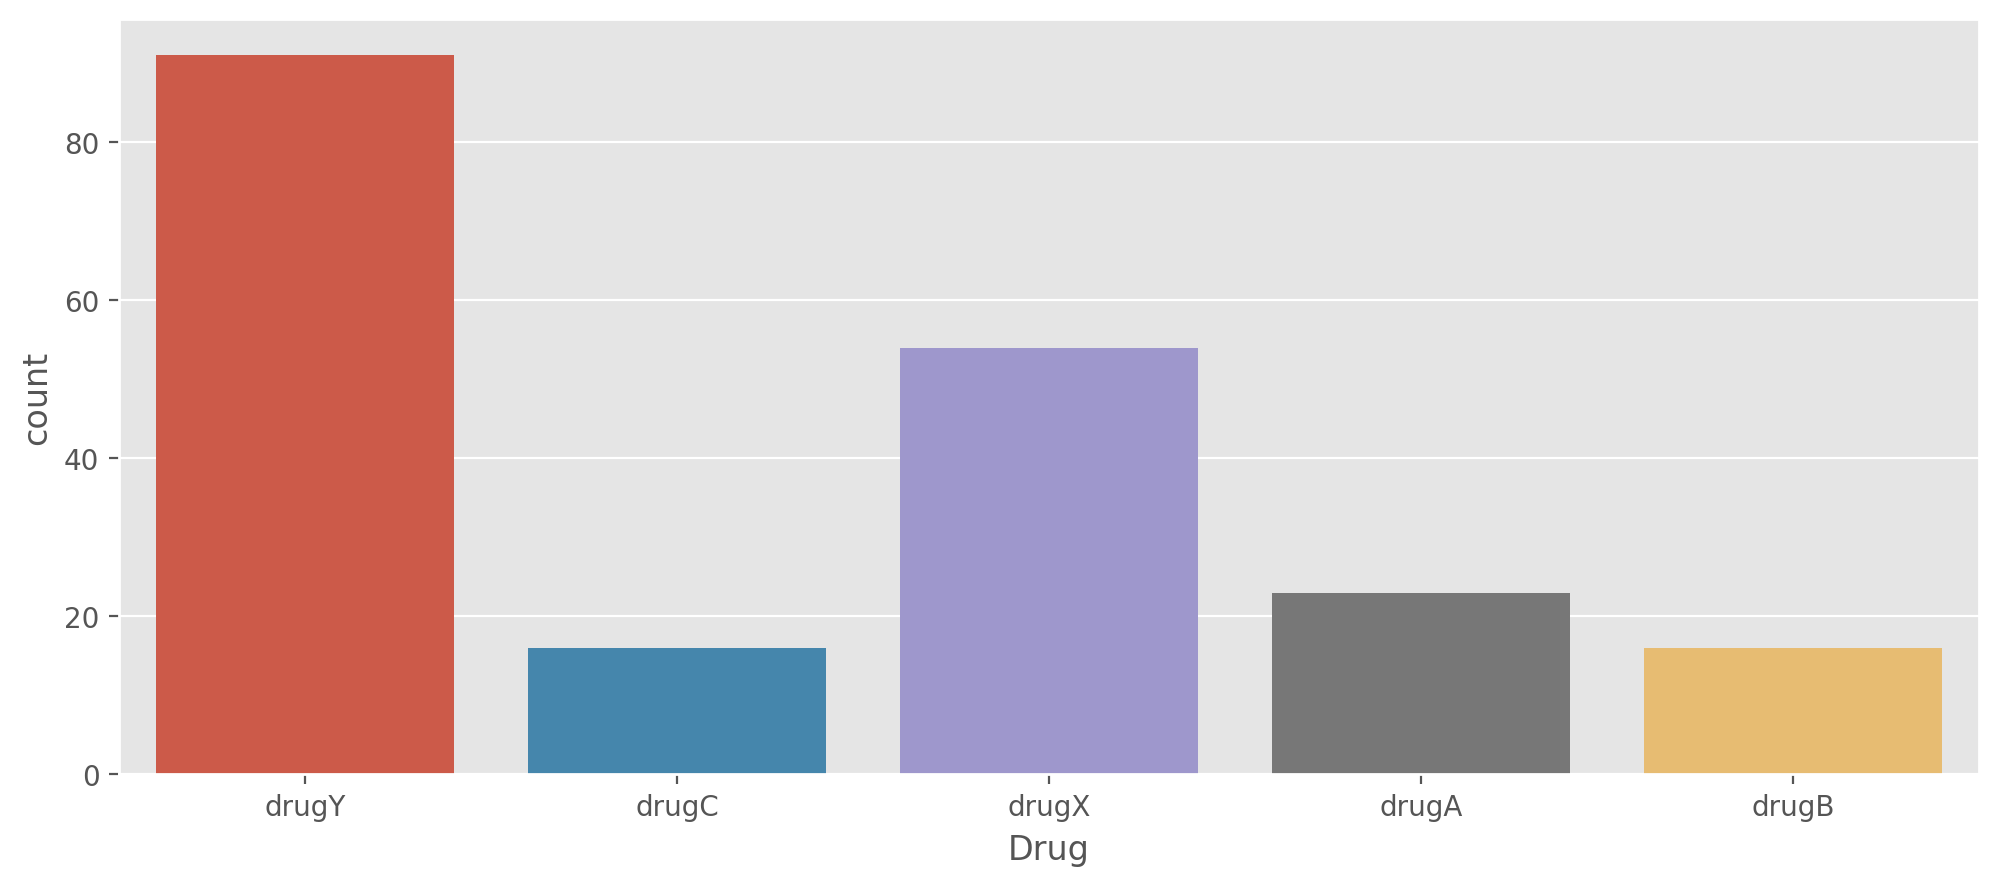

In [7]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.Drug)

<AxesSubplot:xlabel='Drug', ylabel='Age'>

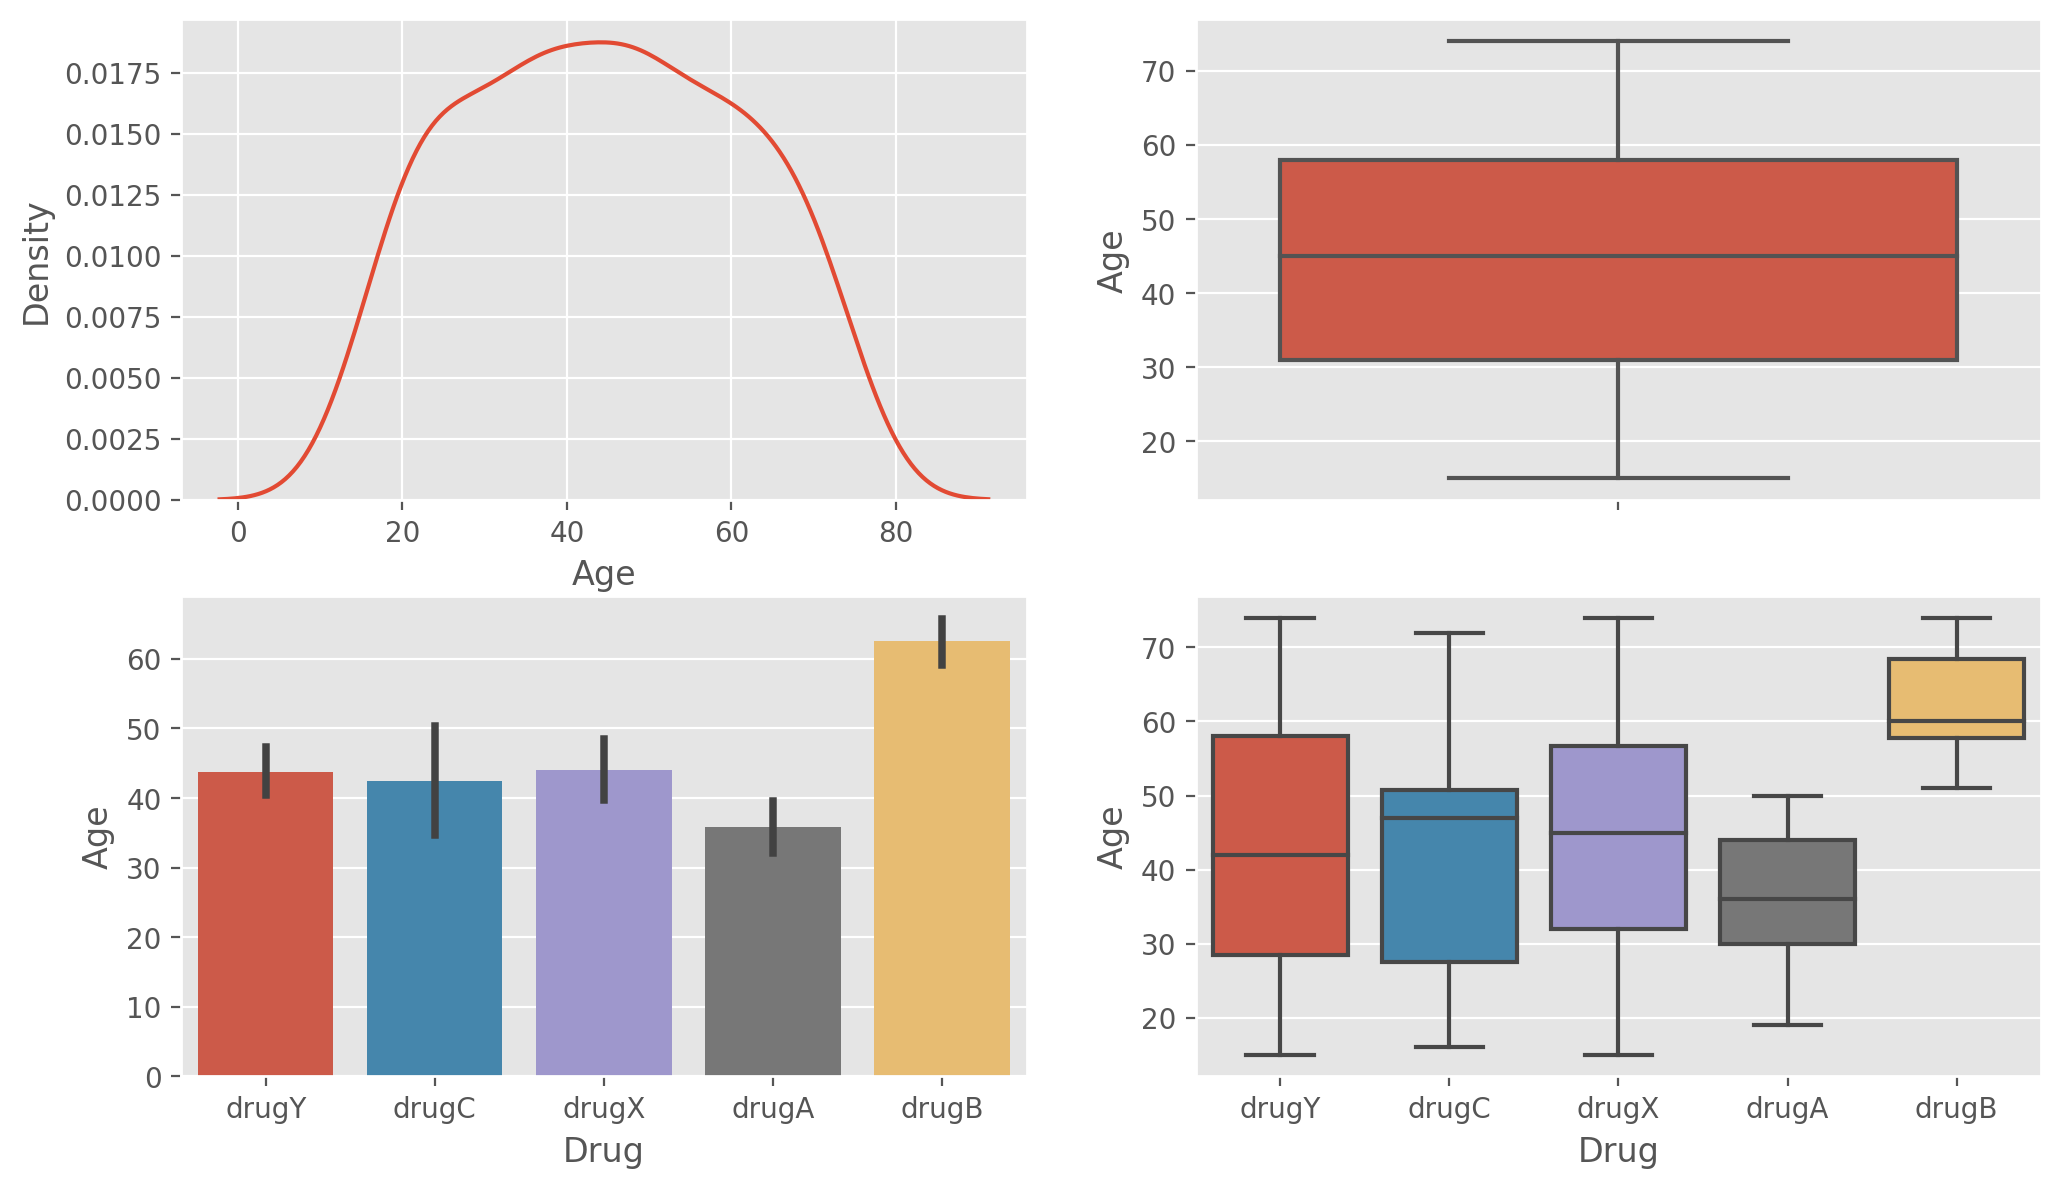

In [8]:
fig = plt.figure(figsize = (12,7), dpi = 200)

fig.add_subplot(2,2,1)
sns.distplot(data.Age, hist = False)

fig.add_subplot(2,2,2)
sns.boxplot(y = data.Age)

fig.add_subplot(2,2,3)
sns.barplot(data.Drug, data.Age)

fig.add_subplot(2,2,4)
sns.boxplot(data.Drug, data.Age)

<AxesSubplot:xlabel='Drug', ylabel='Na_to_K'>

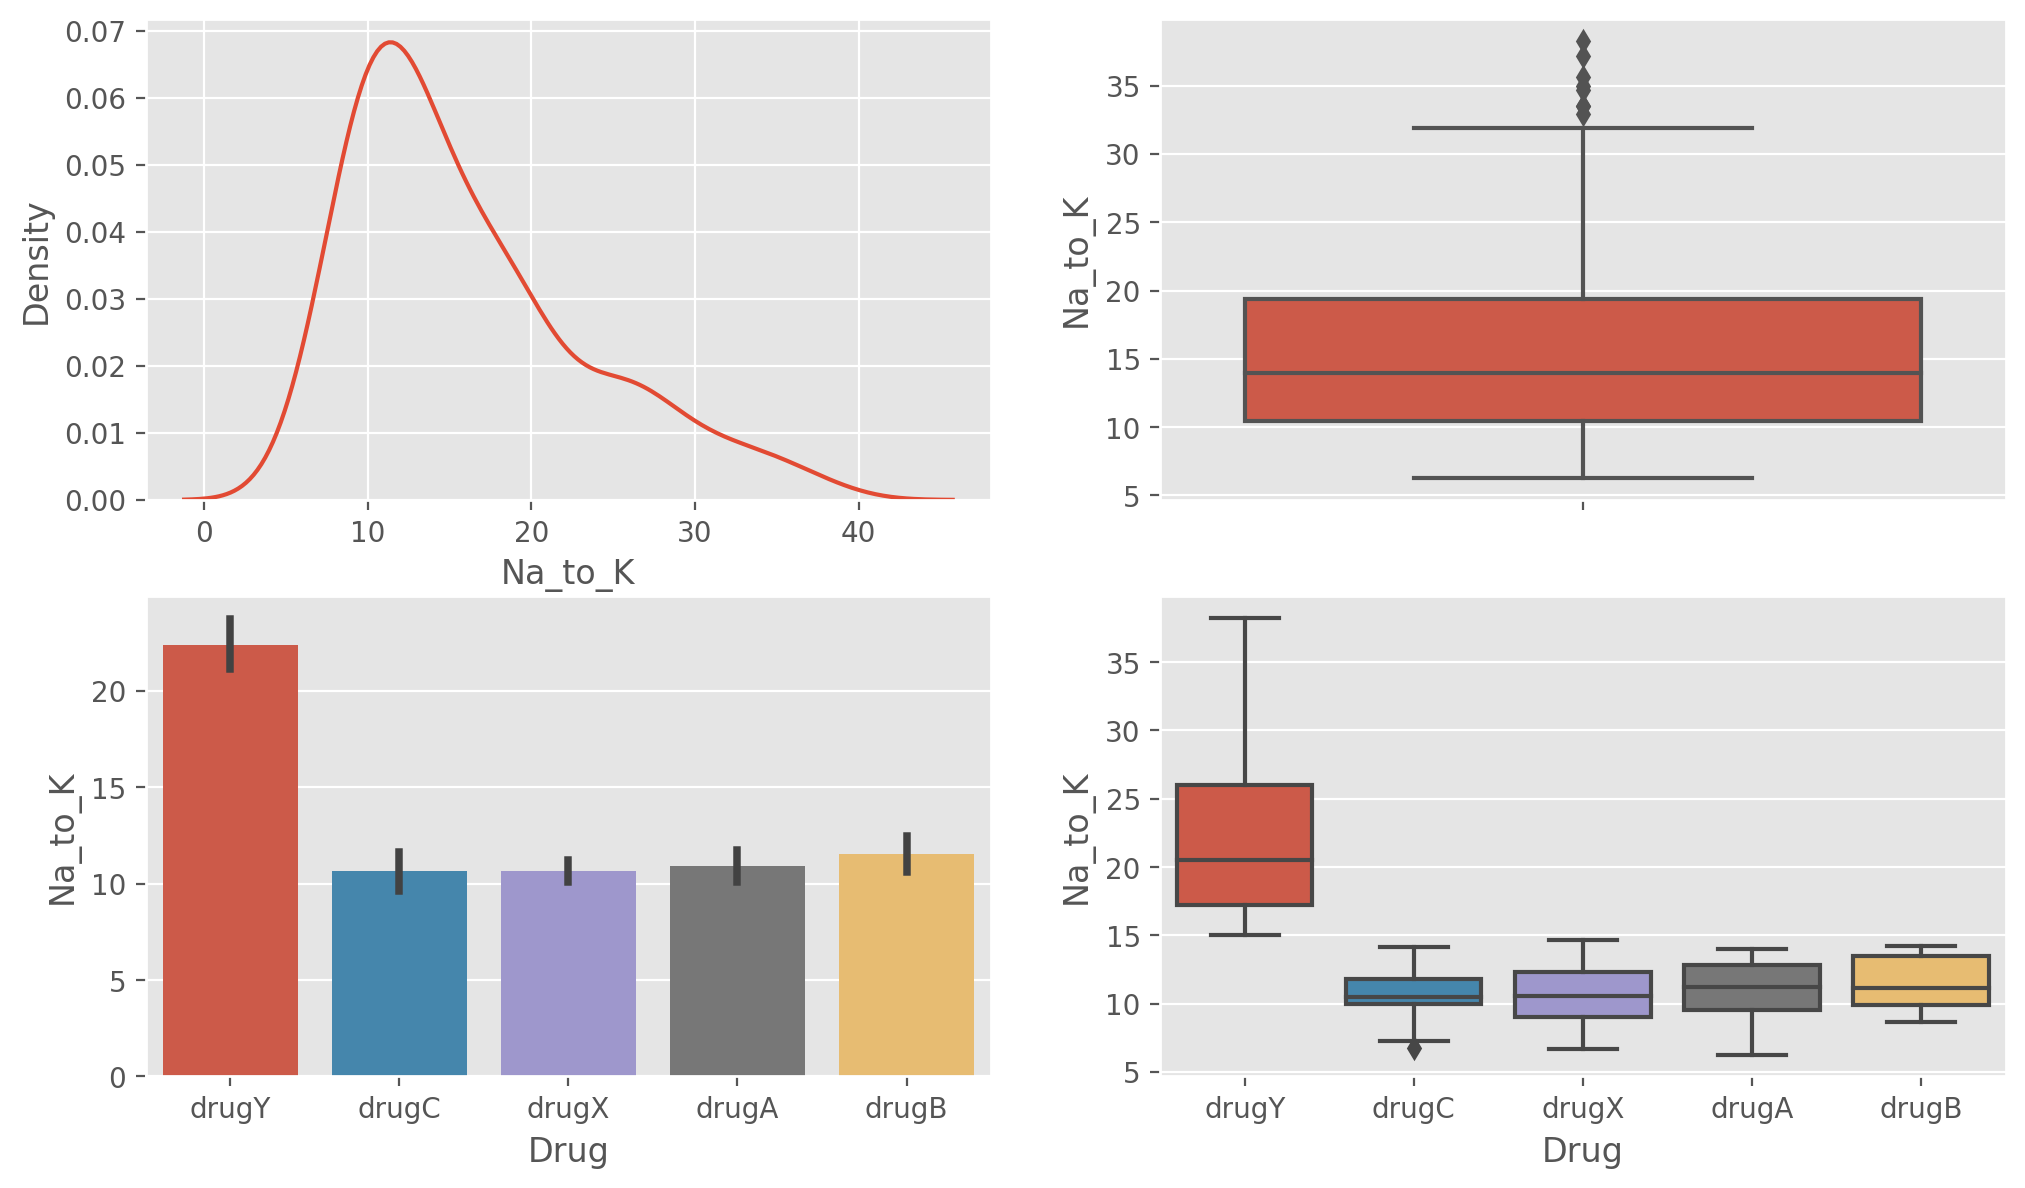

In [9]:
fig = plt.figure(figsize = (12,7), dpi = 200)

fig.add_subplot(2,2,1)
sns.distplot(data.Na_to_K, hist = False)

fig.add_subplot(2,2,2)
sns.boxplot(y = data.Na_to_K)

fig.add_subplot(2,2,3)
sns.barplot(data.Drug, data.Na_to_K)

fig.add_subplot(2,2,4)
sns.boxplot(data.Drug, data.Na_to_K)

<AxesSubplot:xlabel='Drug', ylabel='count'>

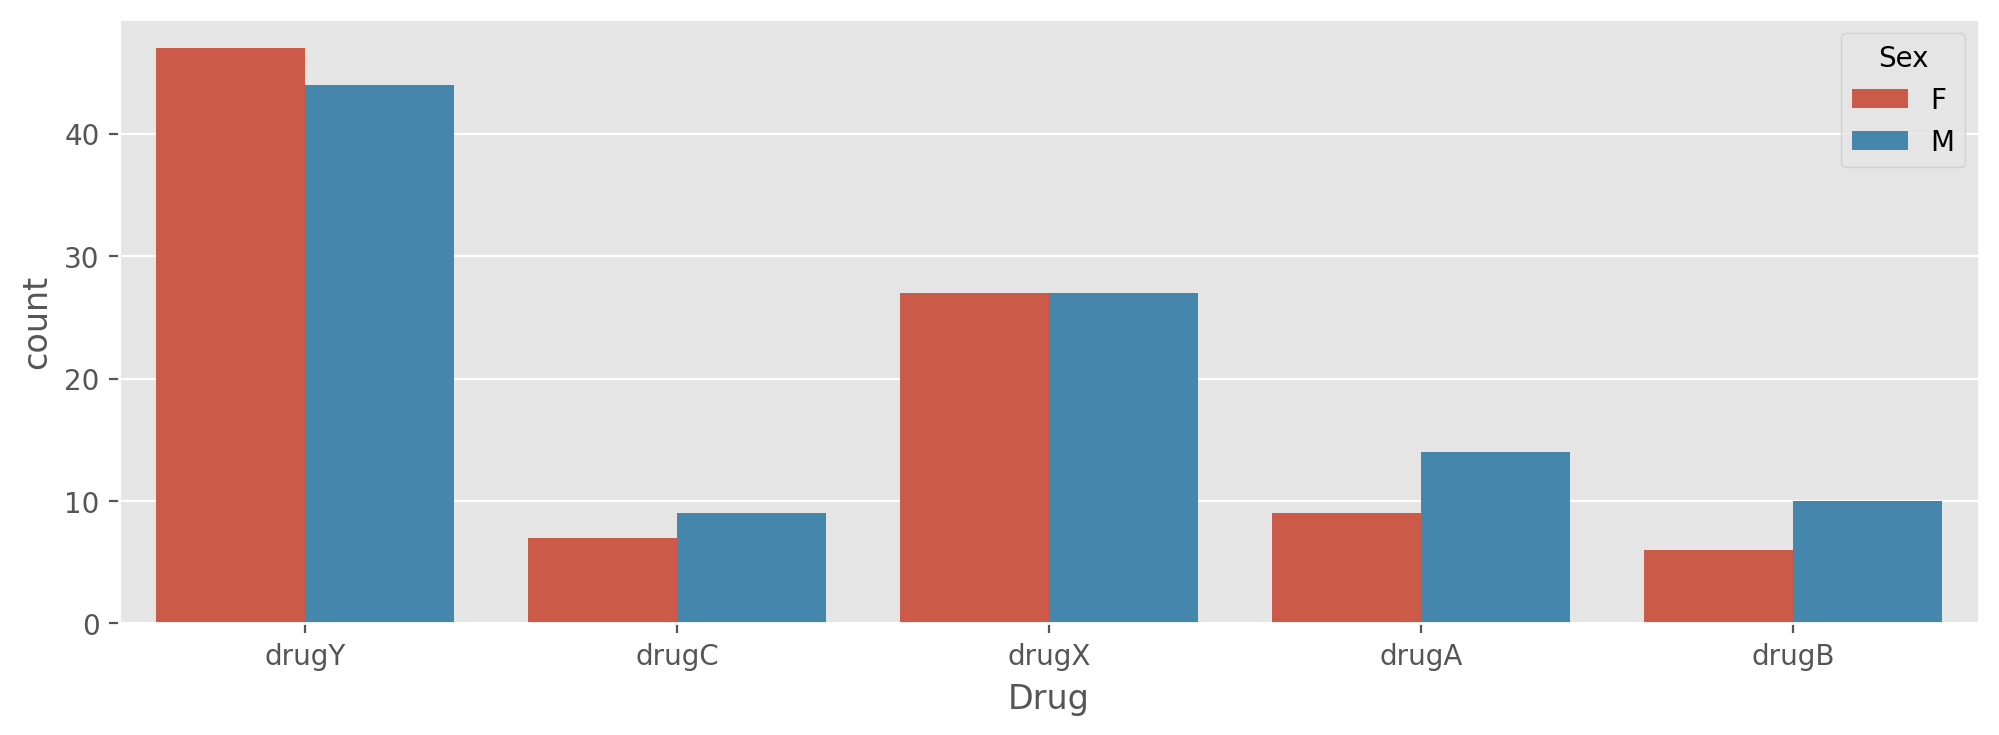

In [10]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data.Drug, hue = data.Sex )

<AxesSubplot:xlabel='Drug', ylabel='count'>

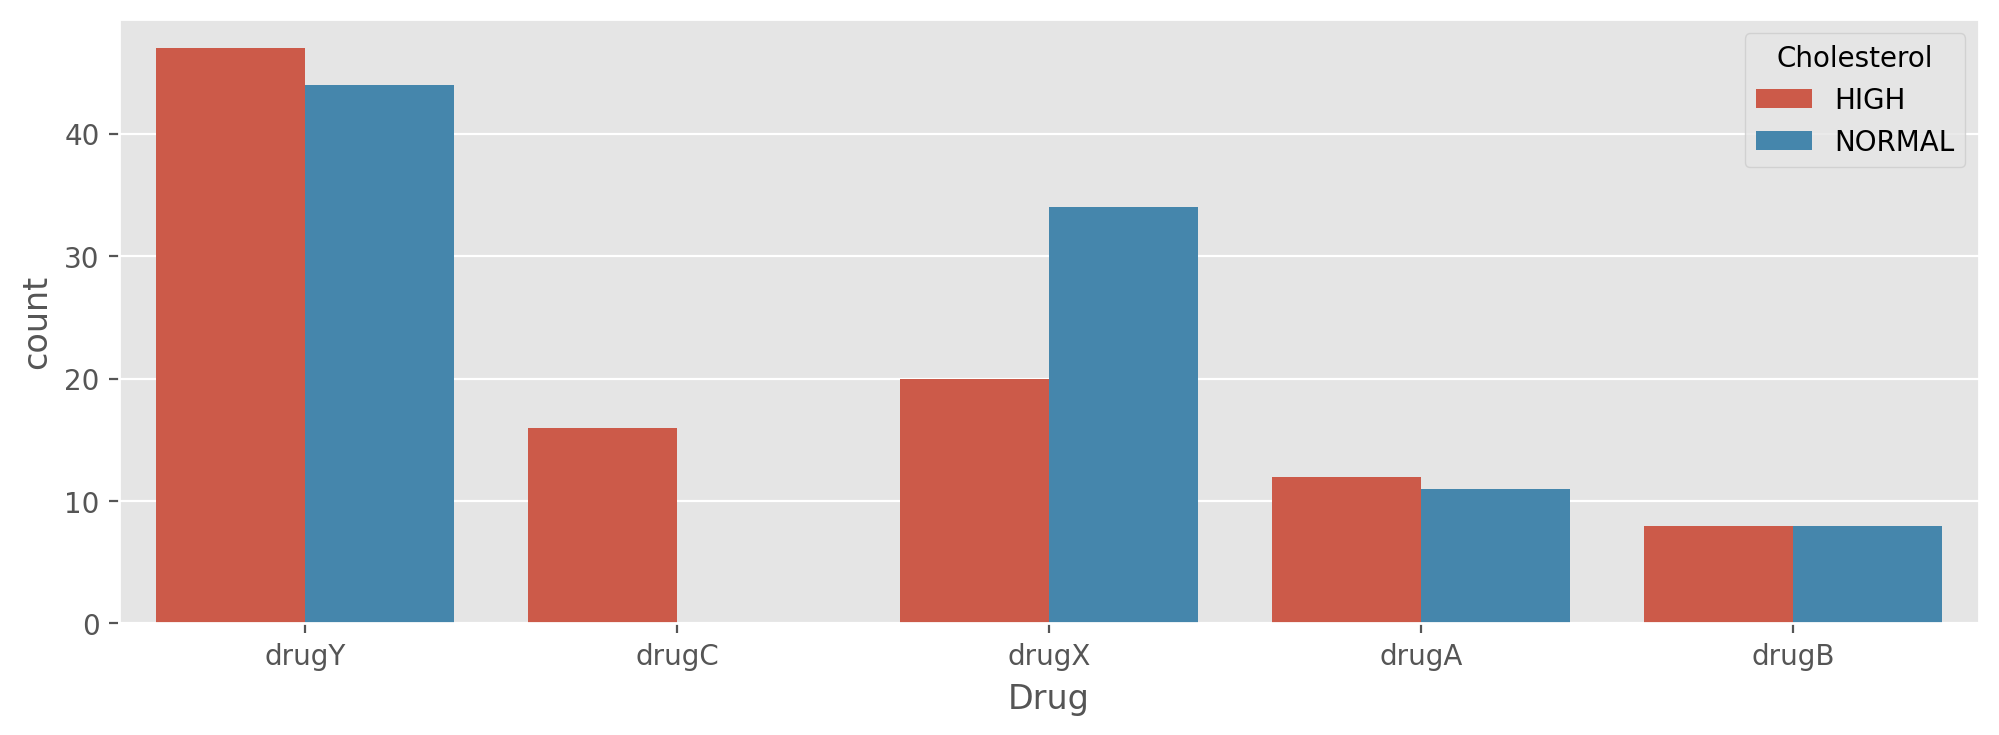

In [11]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data.Drug, hue = data.Cholesterol)

<AxesSubplot:xlabel='Drug', ylabel='count'>

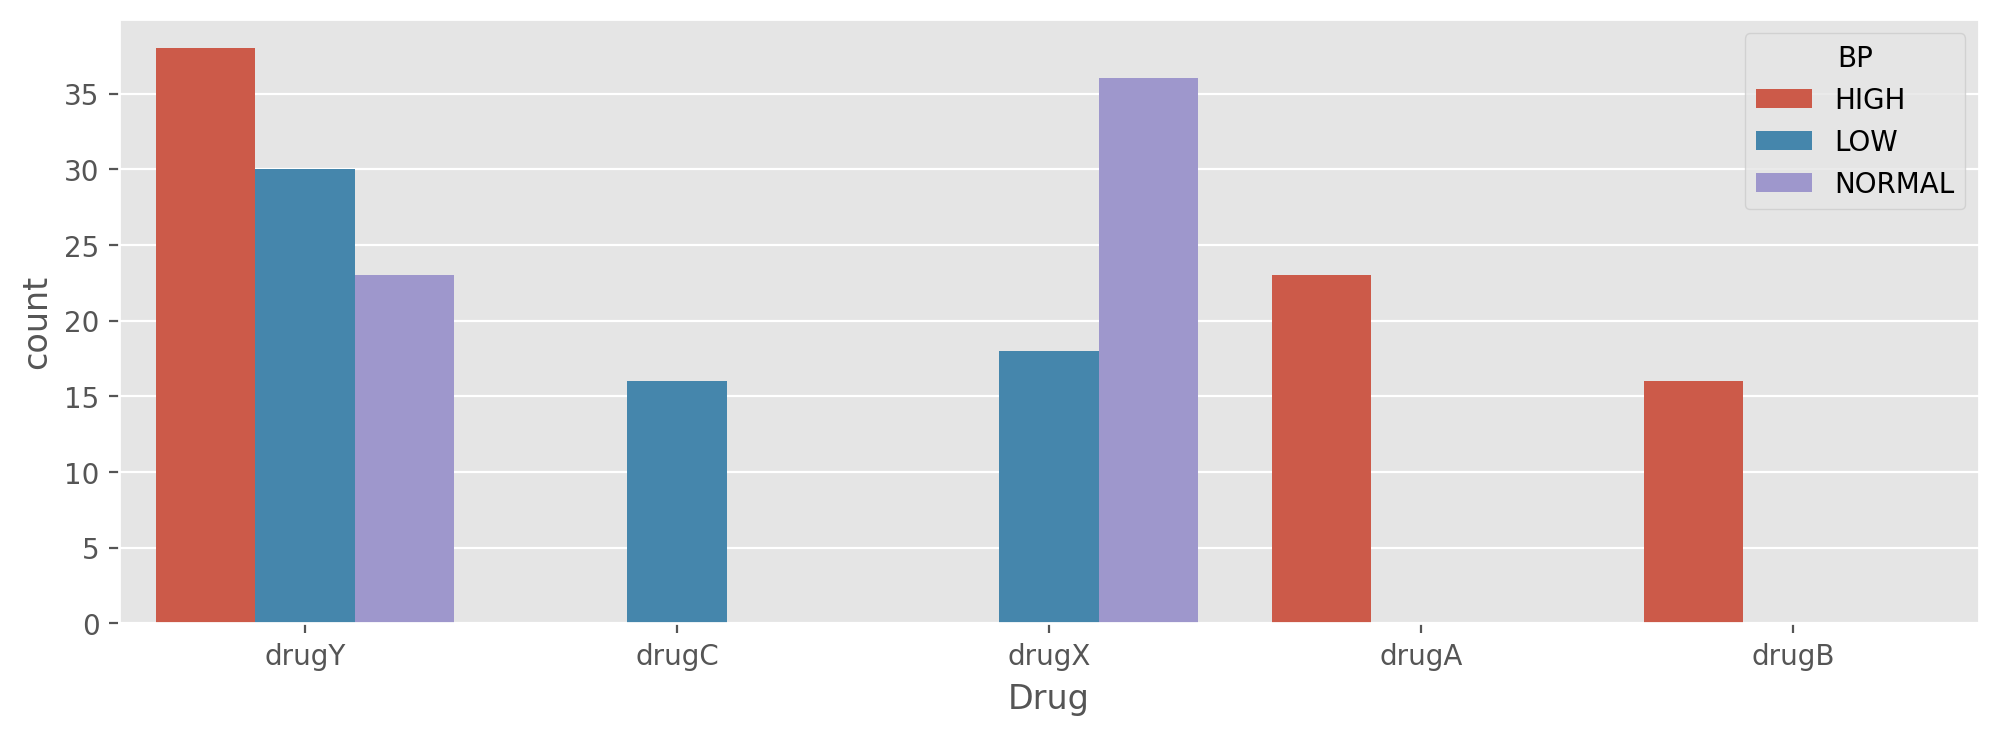

In [12]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data.Drug, hue = data.BP)

In [124]:
data.Drug.value_counts()

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64

In [13]:
data.Sex = data.Sex.map({'F' : 1, 'M' : 0}).astype(int)
data.BP = data.BP.map({'LOW' : 0, 'NORMAL' : 1, 'HIGH' : 2}).astype(int)
data.Cholesterol = data.Cholesterol.map({'NORMAL' : 0, 'HIGH' : 1})

data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,0,1,13.093,drugC
2,47,0,0,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,0,1,18.043,drugY
5,22,1,1,1,8.607,drugX
6,49,1,1,1,16.275,drugY
7,41,0,0,1,11.037,drugC
8,60,0,1,1,15.171,drugY
9,43,0,0,0,19.368,drugY


In [14]:
cols = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
X = data[cols].values
Y = data[['Drug']].values

In [15]:
print(X[:5])
print('\n')
print(Y[:5])

[[23.     1.     2.     1.    25.355]
 [47.     0.     0.     1.    13.093]
 [47.     0.     0.     1.    10.114]
 [28.     1.     1.     1.     7.798]
 [61.     1.     0.     1.    18.043]]


[['drugY']
 ['drugC']
 ['drugC']
 ['drugX']
 ['drugY']]


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [127]:
pd.DataFrame(y_train).value_counts()

drugY    69
drugX    47
drugA    20
drugB    12
drugC    12
dtype: int64

**DecisionTreeClassifier**(
>      class_weight=None, criterion='entropy', max_depth=8
       max_features=None, max_leaf_nodes=None,
       min_impurity_decrease=0.0, min_impurity_split=None,
       min_samples_leaf=1, min_samples_split=2,
       min_weight_fraction_leaf=0.0, presort=False,
       random_state=14, splitter='best')**

In [119]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4, max_features = 5, 
                                    max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                    min_samples_split = 2, min_impurity_split = None)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=5)

In [120]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [121]:
from sklearn.metrics import accuracy_score
print('Training Accuracy : ', accuracy_score(y_train, y_pred_train))
print('Testing Accuracy  : ', accuracy_score(y_test, y_pred_test))

Training Accuracy :  1.0
Testing Accuracy  :  1.0


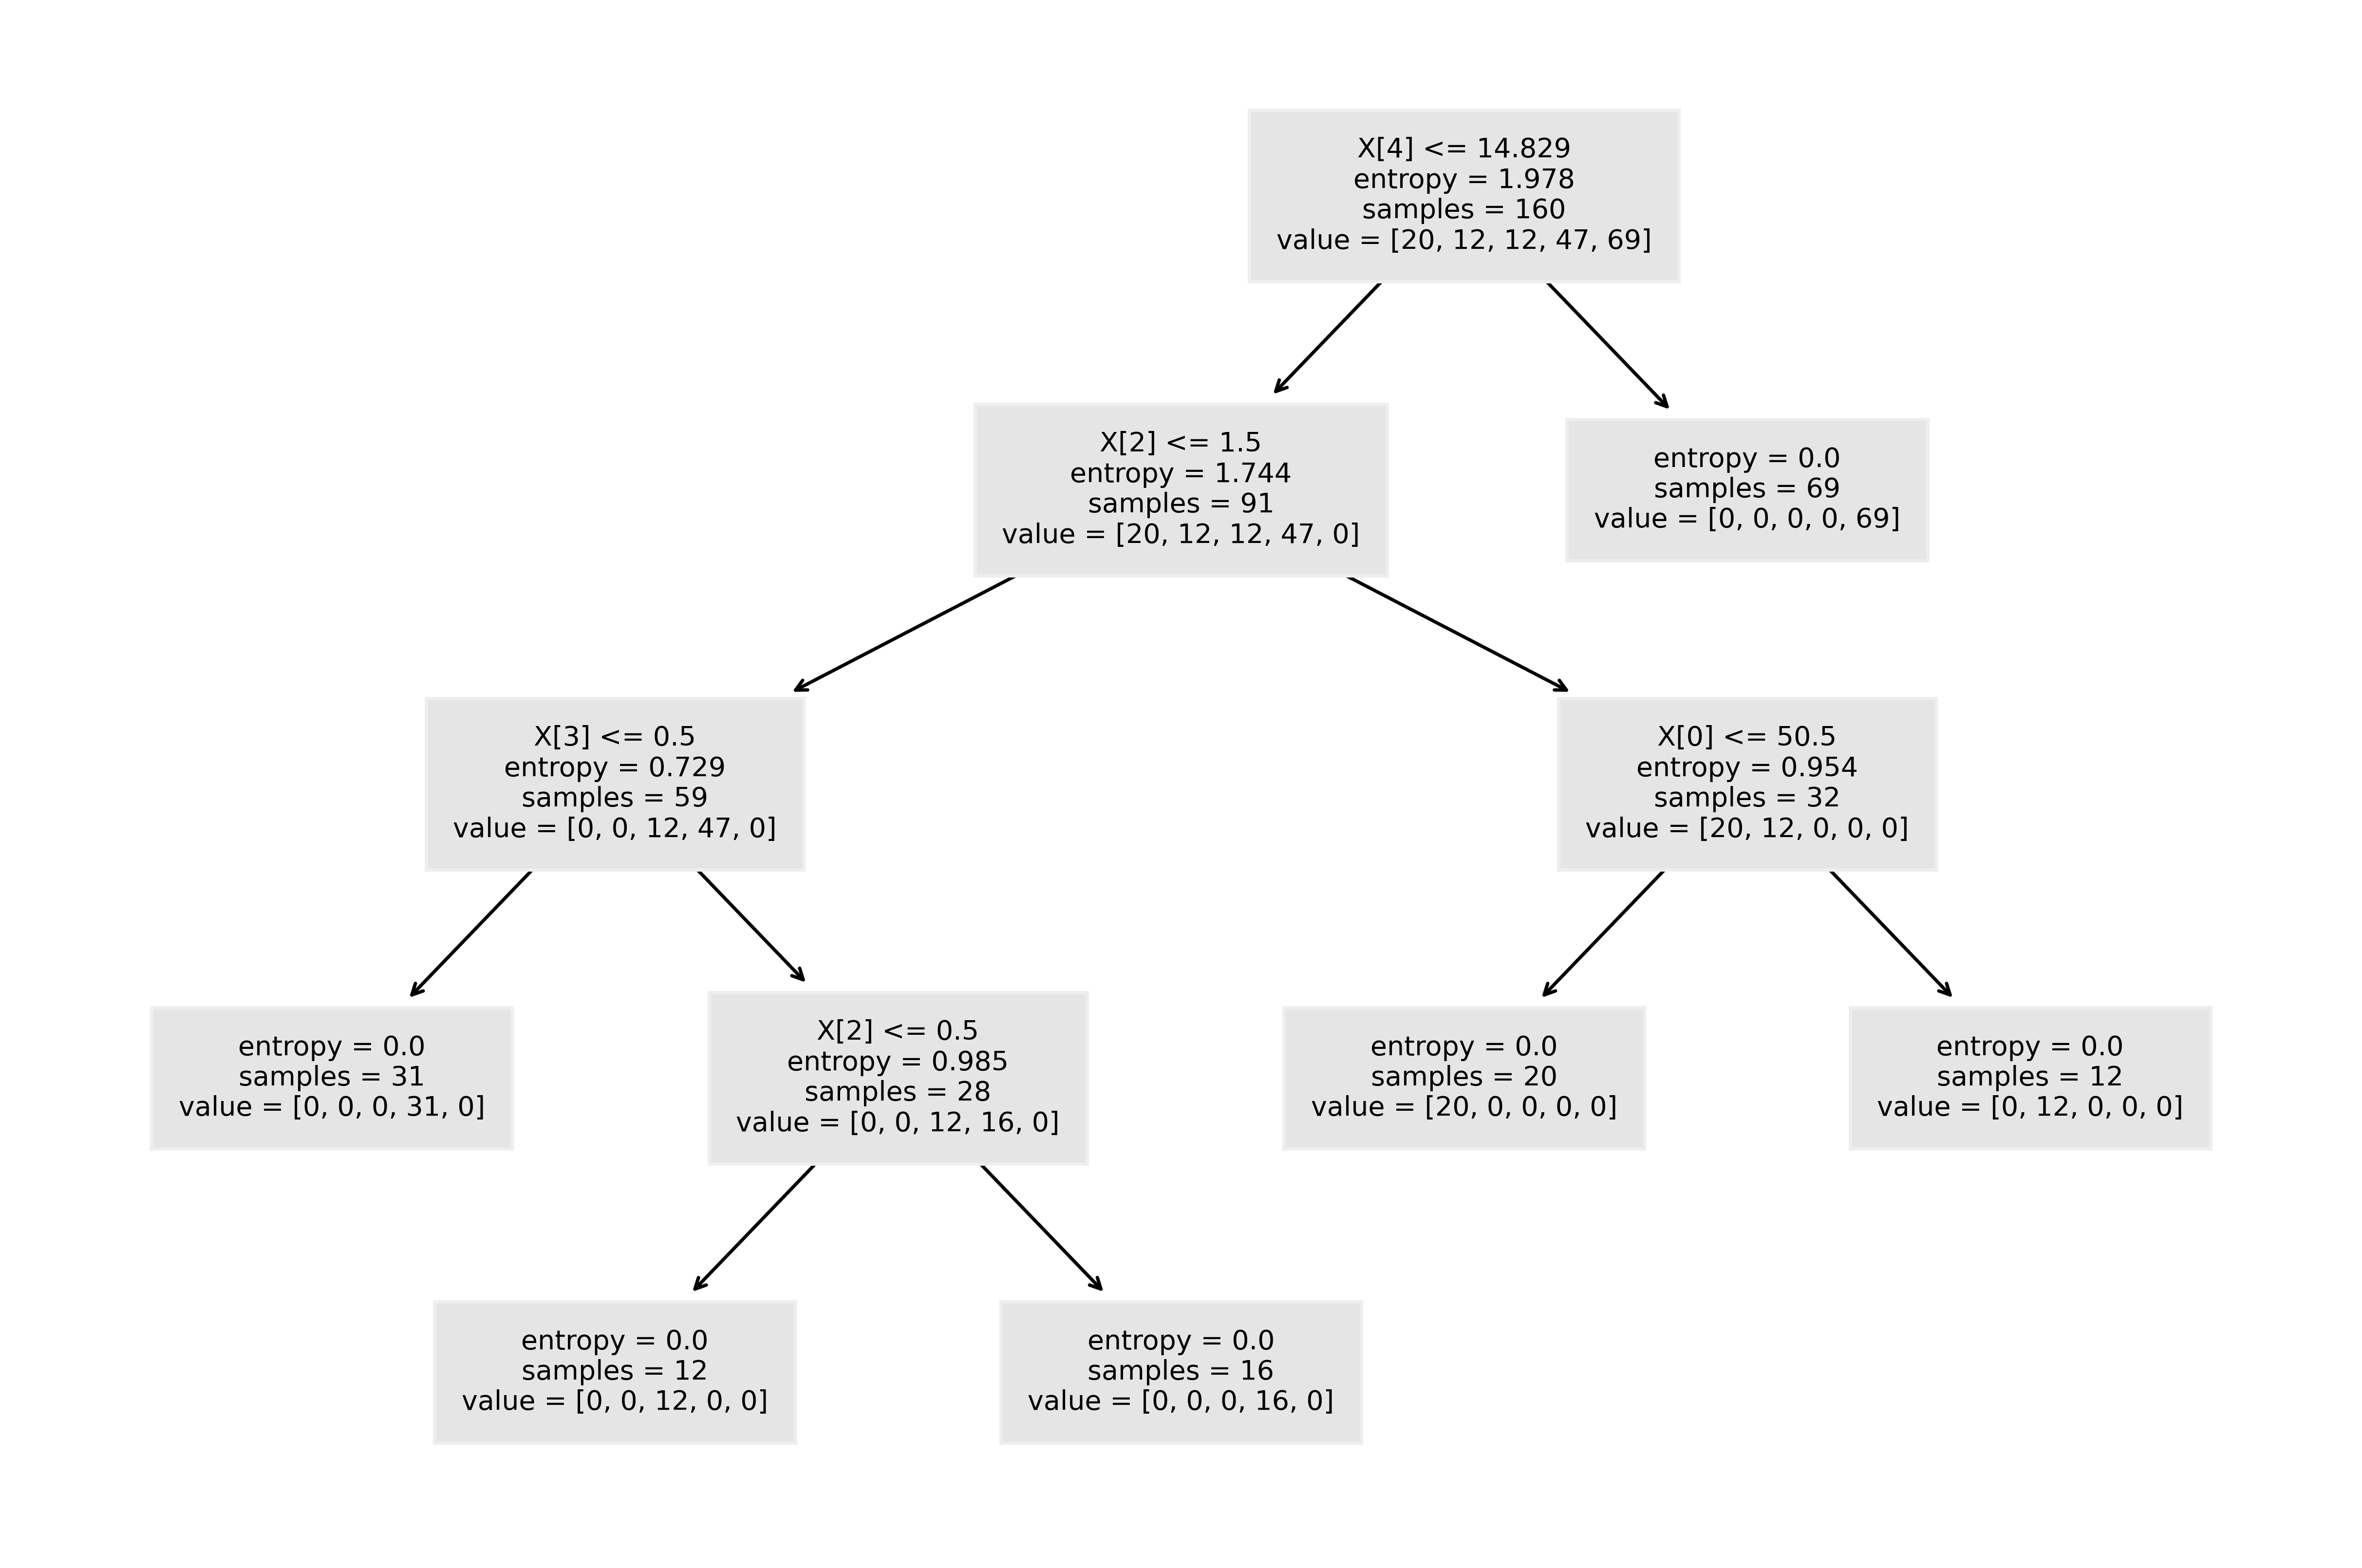

In [122]:
from sklearn import tree
plt.figure(dpi = 1000)
tree.plot_tree(classifier, fontsize = 4)
plt.show()

In [128]:
x_test[1]

array([26.   ,  1.   ,  2.   ,  0.   , 19.161])

In [129]:
y_pred_test[1]

'drugY'

In [135]:
x_test[2]

array([61.  ,  1.  ,  0.  ,  0.  ,  7.34])

In [136]:
y_pred_test[2]

'drugX'